In [ ]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv("/content/housing.csv",names=column_names, header=None, delim_whitespace=True)
housing.head()

<ipython-input-22-76553d3f81c1>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv("/content/housing.csv",names=column_names, header=None, delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
housing.shape

(506, 14)

In [ ]:
x=housing.drop("MEDV",axis=1)
y=housing["MEDV"]
x.shape,y.shape

((506, 13), (506,))

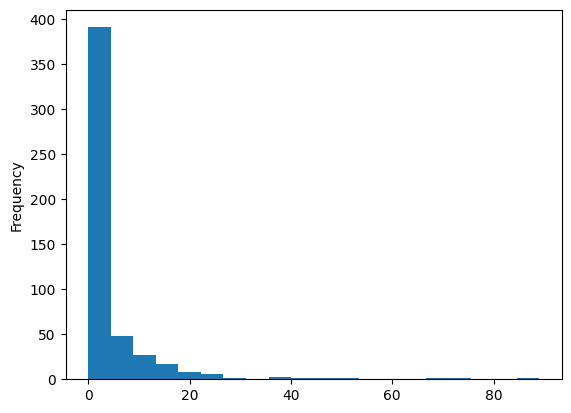

In [ ]:
import matplotlib.pyplot as plt
housing["CRIM"].plot.hist(bins=20);

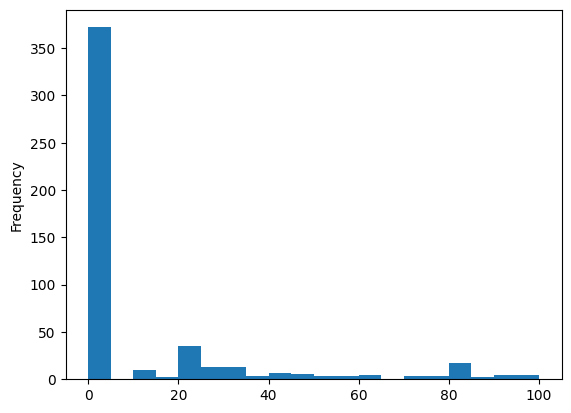

In [ ]:
housing.ZN.plot.hist(bins=20);

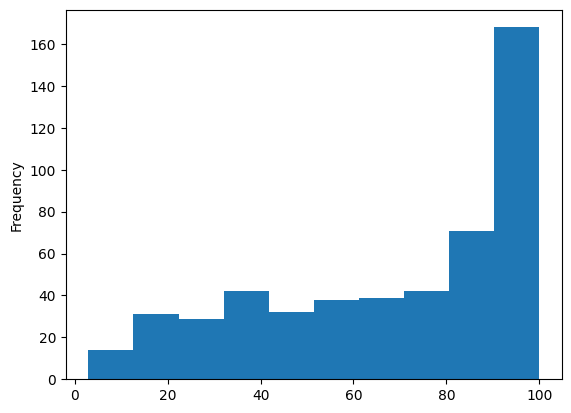

In [ ]:
housing['AGE'].plot.hist();

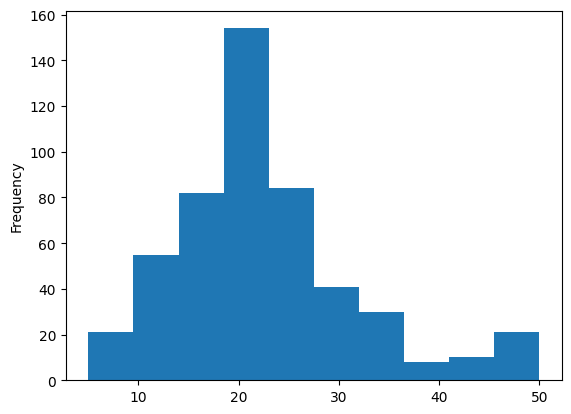

In [ ]:
housing['MEDV'].plot.hist();

In [ ]:
housing["RAD"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [ ]:
housing["CHAS"].unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (StandardScaler(),['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
)
ct.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT'])])

In [ ]:
ct.transform(x_train)
ct.transform(x_test)
ct.transform(x_valid)

array([[-0.38674469, -0.49733164, -0.72677933, -0.47985401, -0.63320542,
        -0.93941252,  0.05729368, -0.4850783 , -0.73804837,  0.41202842,
         0.44298965, -0.51011446],
       [-0.38109581, -0.49733164, -0.34952752, -0.30083958, -0.24679609,
         0.60534789, -0.79039653, -0.4850783 , -0.0968925 ,  1.1792666 ,
         0.34344547,  0.23792843],
       [-0.35797225, -0.49733164,  1.58461349,  0.58570806,  0.21494213,
         1.08963205, -0.79222124, -0.60365299,  0.22673855,  1.31466158,
         0.42288626,  0.02842018],
       [ 0.31772292, -0.49733164,  1.03469643,  0.2447282 ,  0.16890781,
         0.23771612, -0.75390253,  1.7678409 ,  1.62506897,  0.863345  ,
        -2.78814302, -0.05172728],
       [ 4.20155403, -0.49733164,  1.03469643,  1.17389832, -1.07820388,
         0.61241773, -1.03135054,  1.7678409 ,  1.62506897,  0.863345  ,
        -0.28592016,  2.10662954],
       [-0.38293006,  0.35483444, -0.58168248, -0.77821139,  0.3265405 ,
        -0.33140613,  

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
])
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 63.2345 - mae: 63.2345 - val_loss: 23.2746 - val_mae: 23.2746
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.9576 - mae: 13.9576 - val_loss: 8.2557 - val_mae: 8.2557
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2715 - mae: 7.2715 - val_loss: 5.5601 - val_mae: 5.5601
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9896 - mae: 5.9896 - val_loss: 4.5907 - val_mae: 4.5907
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5702 - mae: 5.5702 - val_loss: 4.3560 - val_mae: 4.3560
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3427 - mae: 5.3427 - val_loss: 4.3180 - val_mae: 4.3180
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2773 - mae: 5.2773 - val_loss: 3.8954 - val_mae: 3.8954
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1586 - mae: 5.1586 - val_loss: 4.1730 - val_mae: 4.1730
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

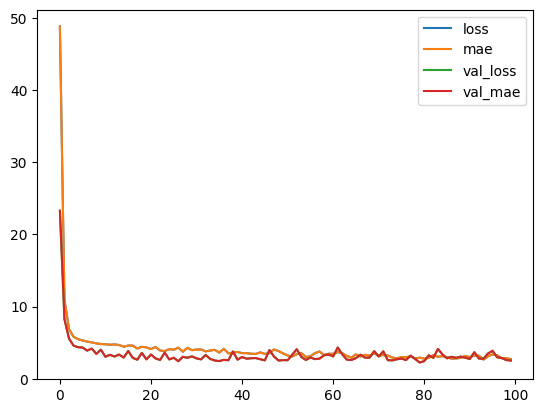

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4397 - mae: 2.4397 


[2.7080109119415283, 2.7080109119415283]

In [ ]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


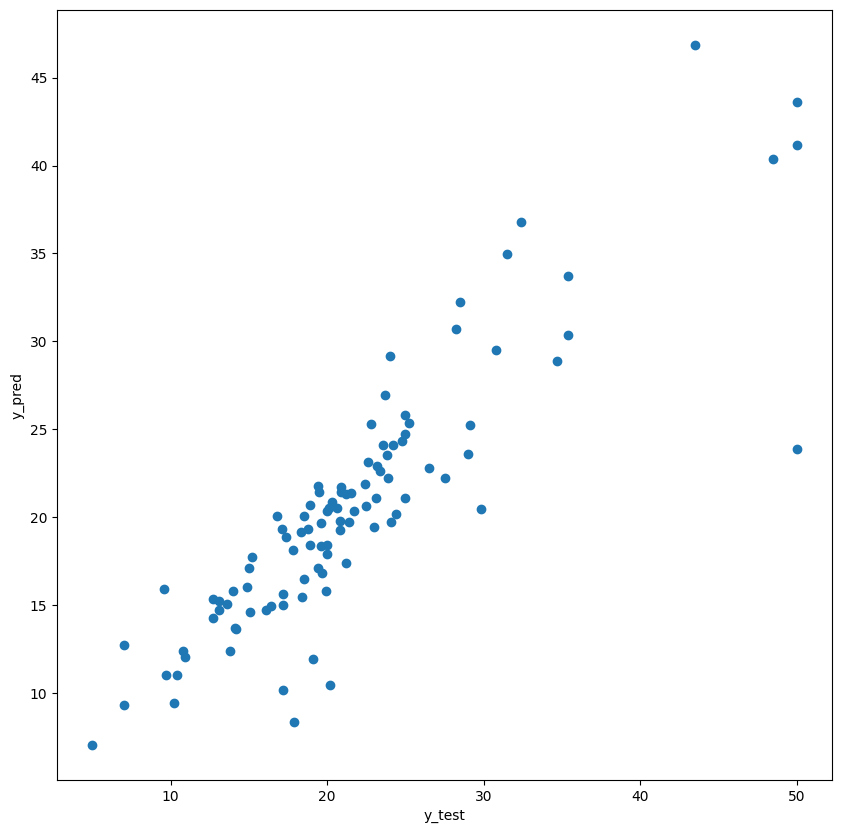

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

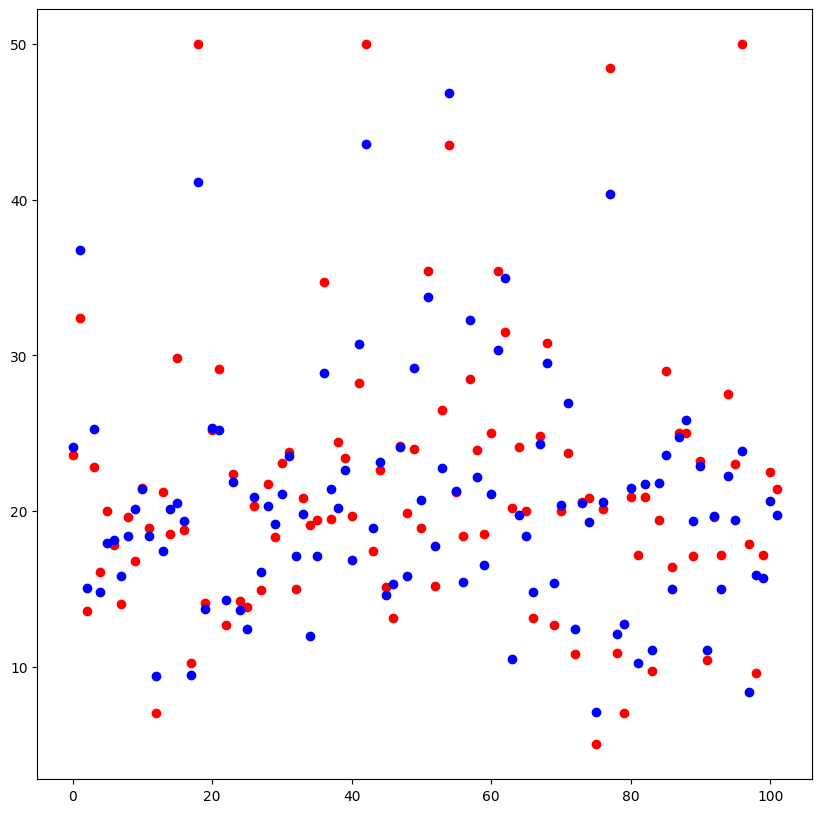

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(y_test)),y_test,color='red')
plt.scatter(range(len(y_pred)),y_pred,color='blue');
